# TASK 2 (Decision Tree using ID3)
- plot_tree library did not worked properly on root node so had create the function.

Information Gains:
AGE: 0.10389267691729642
JOB_STATUS: 0.30316563448891676
OWNS_HOUSE: 0.3948950998563654
CREDIT_RATING: 0.42462303375108656

Root attribute: CREDIT_RATING

Decision Tree:
{'CREDIT_RATING': {'Excellent': 'Yes', 'Fair': {'JOB_STATUS': {False: 'No', True: 'Yes'}}, 'Good': {'AGE': {'Middle': 'Yes', 'Old': 'Yes', 'Young': {'JOB_STATUS': {False: 'No', True: 'Yes'}}}}}}


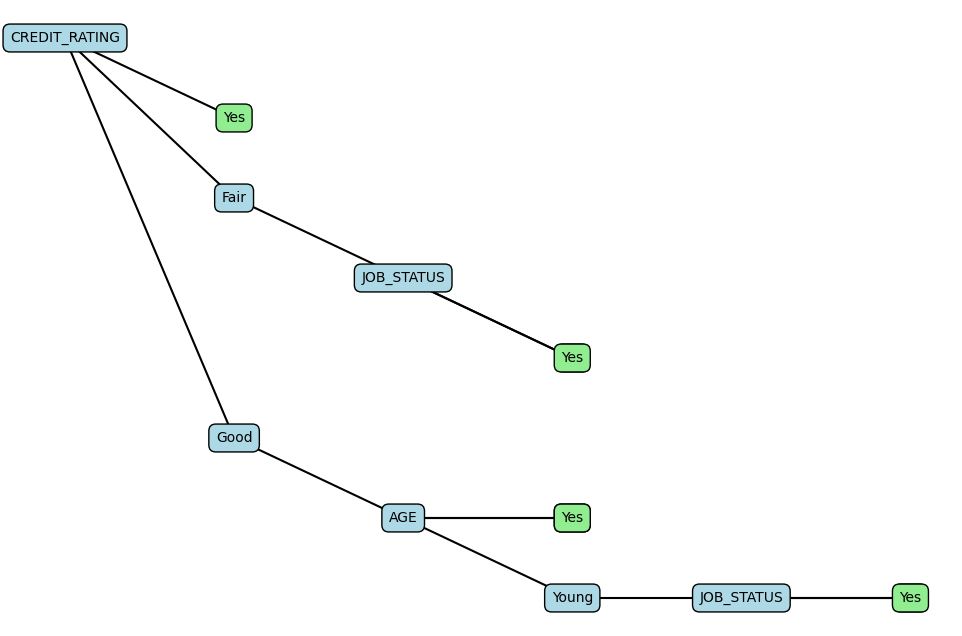

In [28]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt

def entropy(column):
    counts = Counter(column)
    probabilities = [count / len(column) for count in counts.values()]
    entropy = -sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy
    
def information_gain(data, split_attribute_name, target_name="CLASS"):
    total_entropy = entropy(data[target_name])
    
    values = data[split_attribute_name].unique()
    
    weighted_entropy = sum([(len(data[data[split_attribute_name] == value]) / len(data)) * 
                            entropy(data[data[split_attribute_name] == value][target_name])
                            for value in values])
    
    information_gain = total_entropy - weighted_entropy
    return information_gain

data = pd.read_csv('task2 lab 4 (Decision tree).csv')

attributes = ['AGE', 'JOB_STATUS', 'OWNS_HOUSE', 'CREDIT_RATING']
information_gains = {attr: information_gain(data, attr) for attr in attributes}

print("Information Gains:")
for attr, gain in information_gains.items():
    print(f"{attr}: {gain}")

root_attribute = max(information_gains, key=information_gains.get)
print(f"\nRoot attribute: {root_attribute}")

def build_tree(data, attributes, target_attribute="CLASS"):
    
    if len(np.unique(data[target_attribute])) == 1:
        return np.unique(data[target_attribute])[0]
        
    elif len(data) == 0 or len(attributes) == 0:
        return Counter(data[target_attribute]).most_common(1)[0][0]
    
    else:
       
        gains = {attr: information_gain(data, attr) for attr in attributes}
        best_attr = max(gains, key=gains.get)
        
        tree = {best_attr: {}}
        attributes = [attr for attr in attributes if attr != best_attr]
        
        for value in np.unique(data[best_attr]):
            subtree = build_tree(data[data[best_attr] == value], attributes, target_attribute)
            tree[best_attr][value] = subtree
        
        return tree

decision_tree = build_tree(data, attributes)
print("\nDecision Tree:")
print(decision_tree)

def plot_tree(tree, depth=0, pos=None, ax=None, parent=None):
    if pos is None:
        pos = {}
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off')
    
    for node, subtree in tree.items():
        if isinstance(subtree, dict):
            pos[node] = (depth, len(pos))
            ax.text(depth, len(pos), node, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
            if parent:
                ax.plot([parent[0], depth], [parent[1], len(pos)], 'k-')
            plot_tree(subtree, depth + 1, pos, ax, (depth, len(pos)))
        else:
            pos[subtree] = (depth, len(pos))
            ax.text(depth, len(pos), subtree, ha='center', va='center', bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.5'))
            if parent:
                ax.plot([parent[0], depth], [parent[1], len(pos)], 'k-')
    
    return pos

plot_tree(decision_tree)
plt.gca().invert_yaxis()
plt.show()

# TASK 3:

In [1]:
import pandas as pd
df = pd.read_csv('cancer patient data sets.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [3]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


## Replacing NAN with null

In [5]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [7]:
df.shape

(1000, 25)

## Summary Statistics of numeric variables:

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.17,12.01,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.40,0.49,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.84,2.03,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.56,2.62,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.16,1.98,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.84,2.11,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.58,2.13,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.38,1.85,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.49,2.14,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.46,2.12,1.0,3.00,4.0,7.0,7.0


In [9]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
Categorical variables: ['Patient Id', 'Level']


In [10]:
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 2
Number of numerical variables: 23


## Missing Value

In [11]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Patient Id,0,0.0
Age,0,0.0
Gender,0,0.0
Air Pollution,0,0.0
Alcohol use,0,0.0
Dust Allergy,0,0.0
OccuPational Hazards,0,0.0
Genetic Risk,0,0.0
chronic Lung Disease,0,0.0
Balanced Diet,0,0.0


In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df.isnull().sum()

missing_values_after = df.isnull().sum() # rechecking

print("Before: \n", missing_values)
print("\nAfter: \n",missing_values_after)

Before: 
 Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

After: 
 Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic

In [13]:
df[df.duplicated(keep=False)]

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


# Explanation for Task 3 Part C:

- There is no data duplication or missing values however to handle missing data we have used **pandas' fillna** method that fills the column values with the mode of the data if the column is of object data type or fill it with mean if the columns are of other data types.

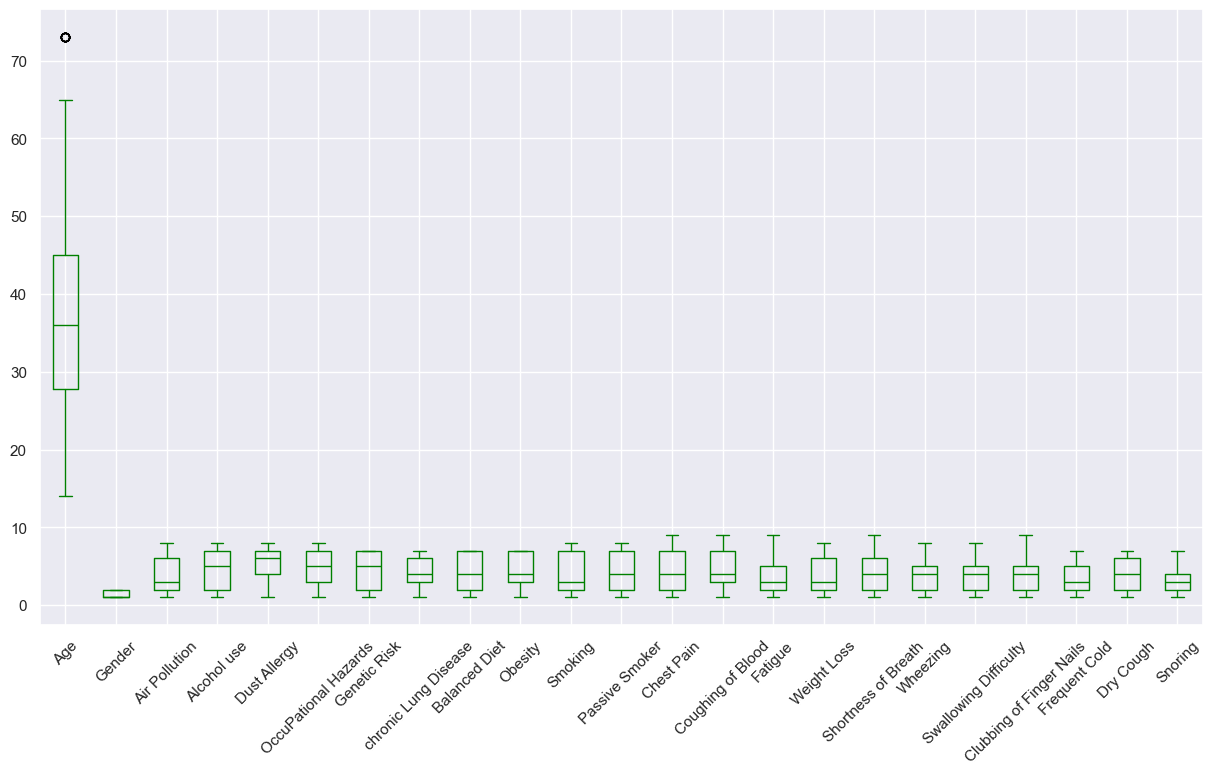

In [14]:
df.plot(kind='box', rot=45,color='green')

plt.show()

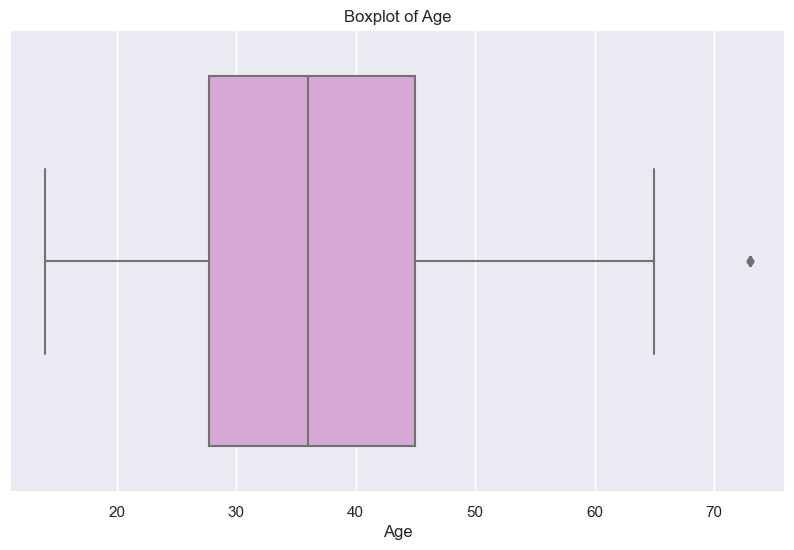

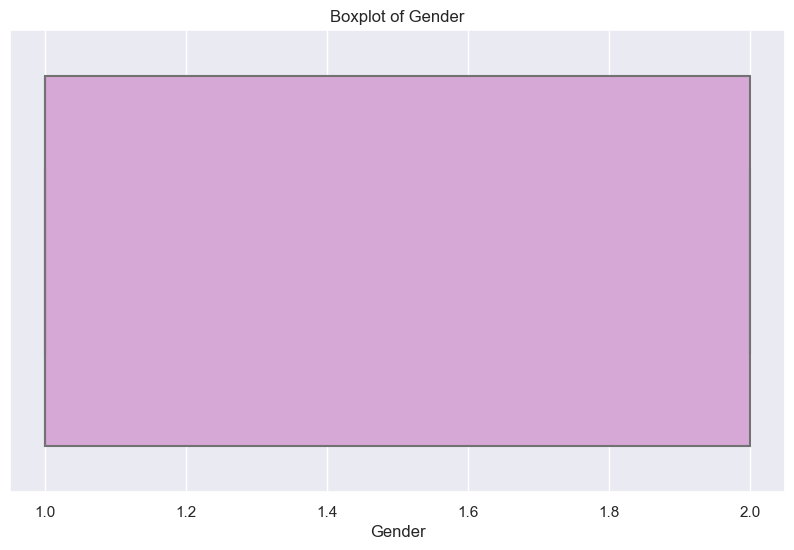

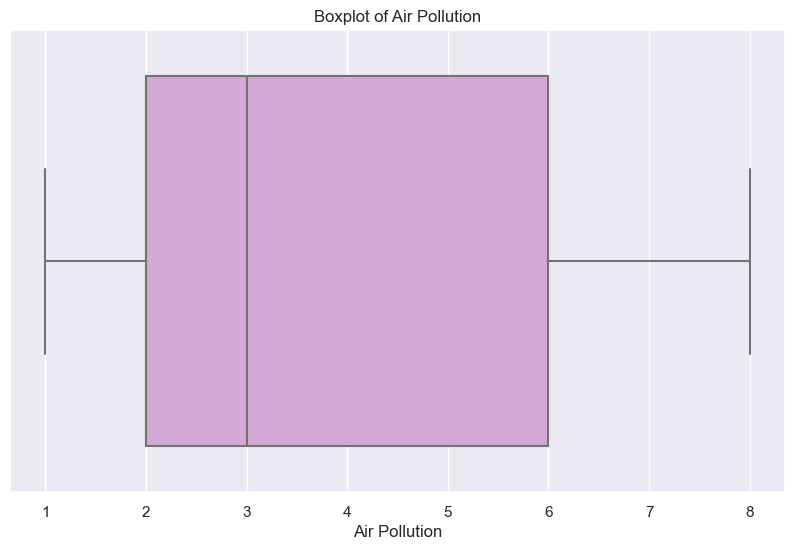

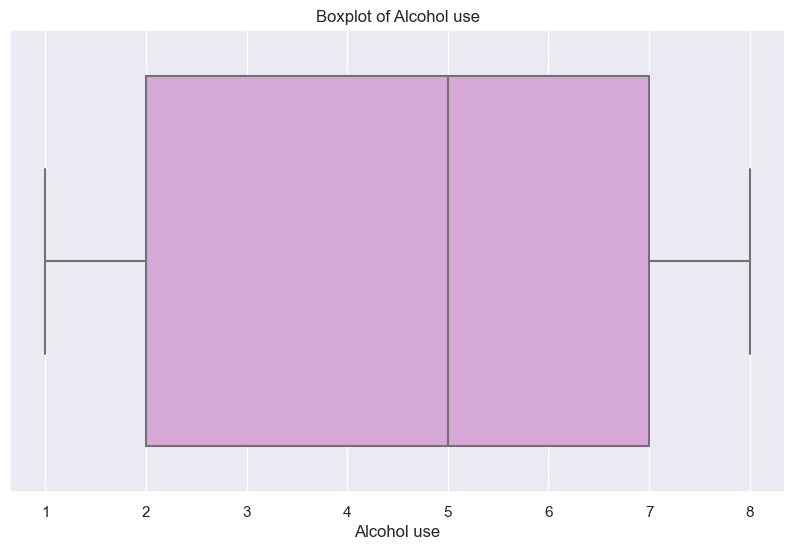

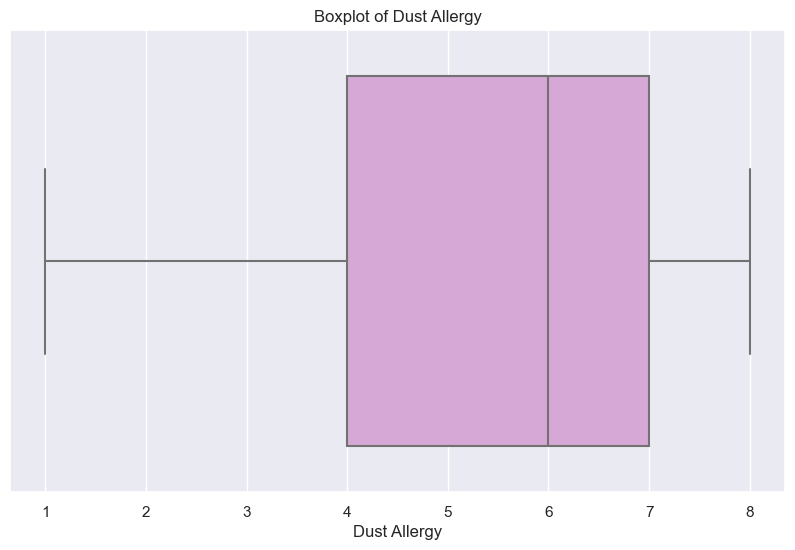

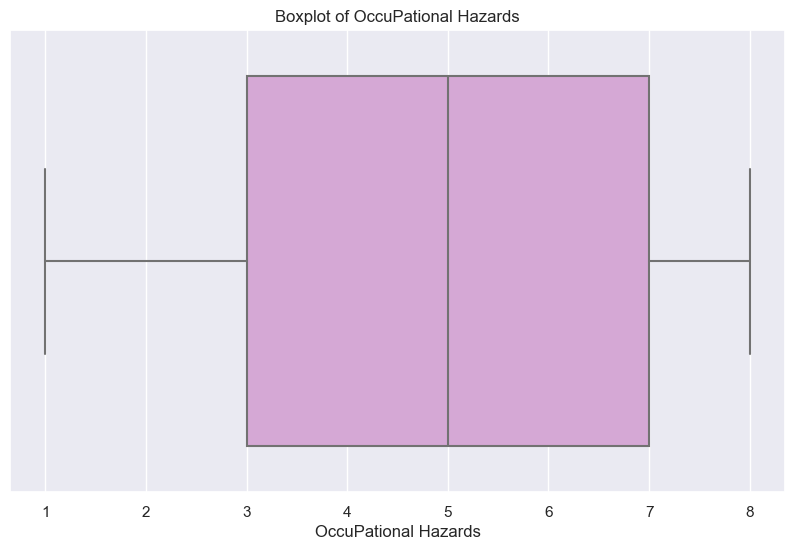

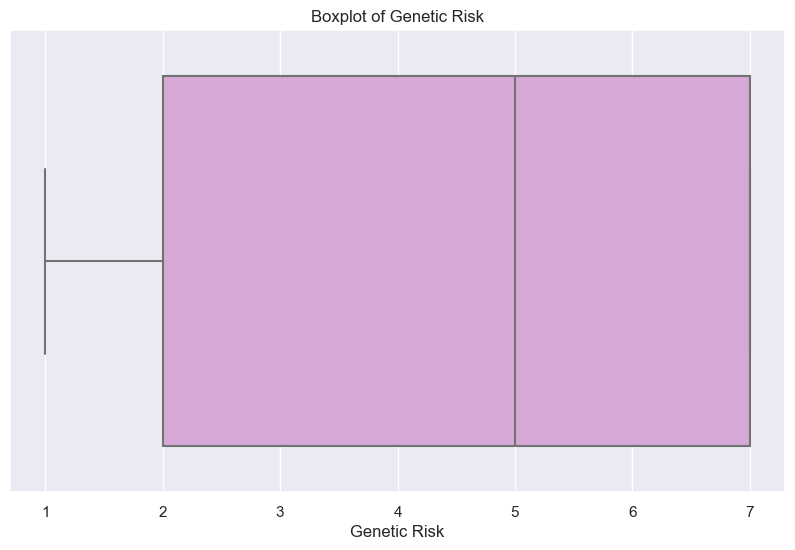

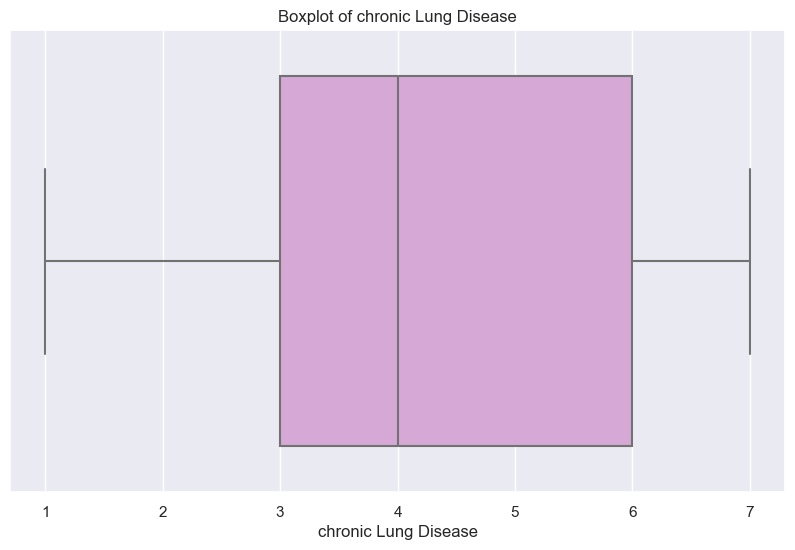

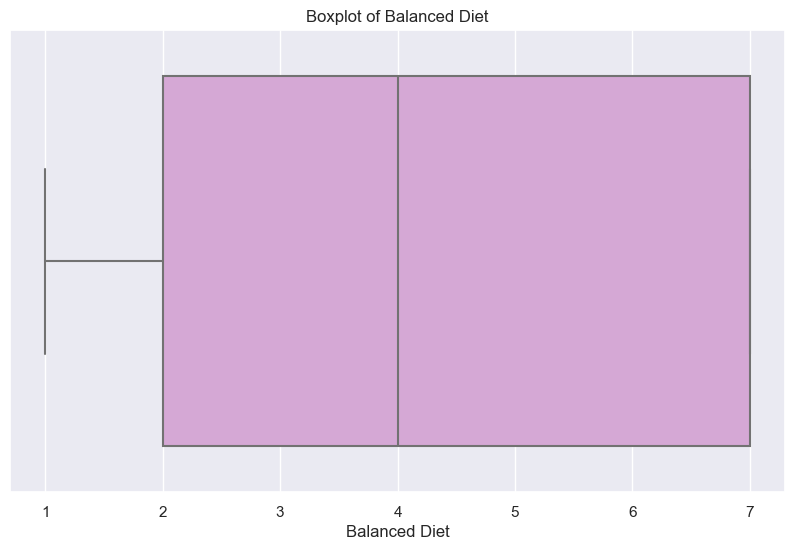

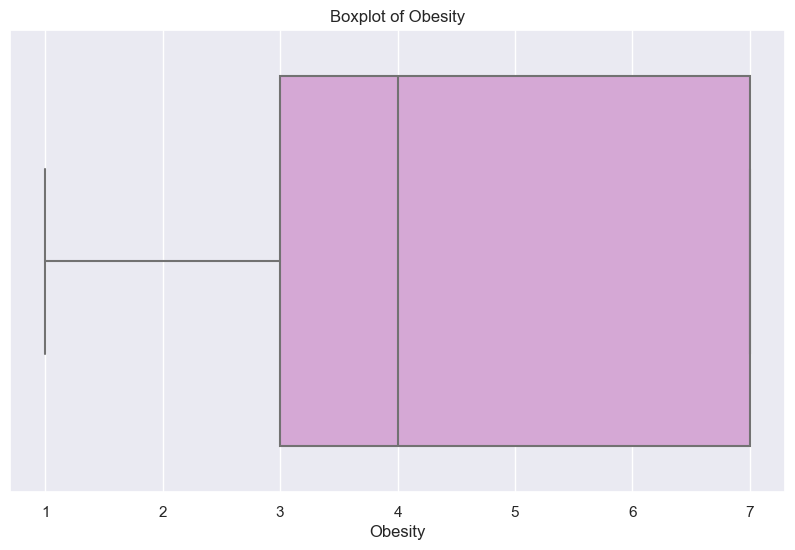

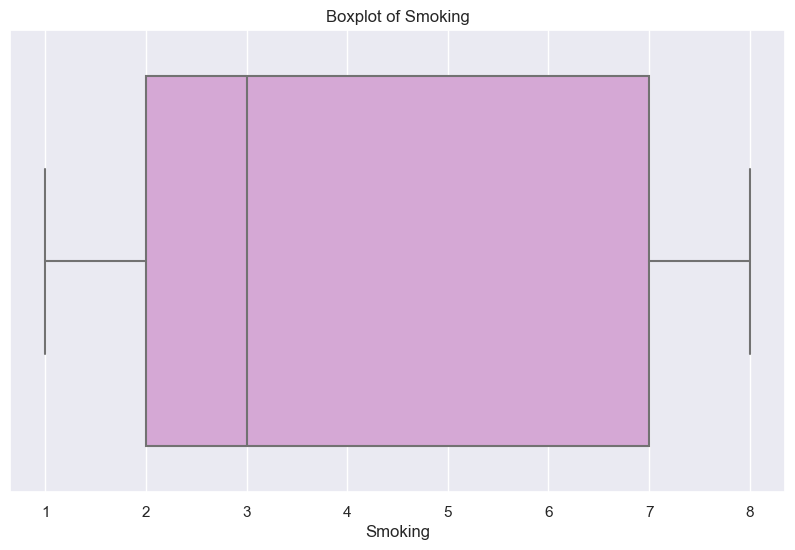

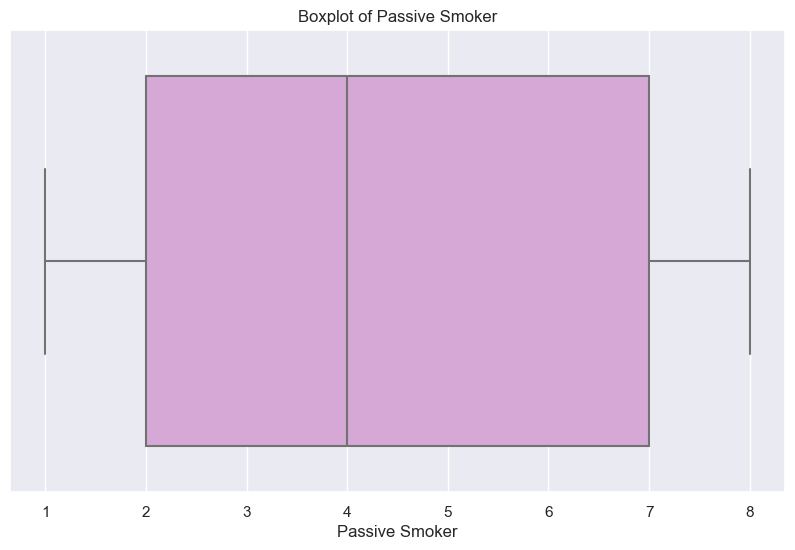

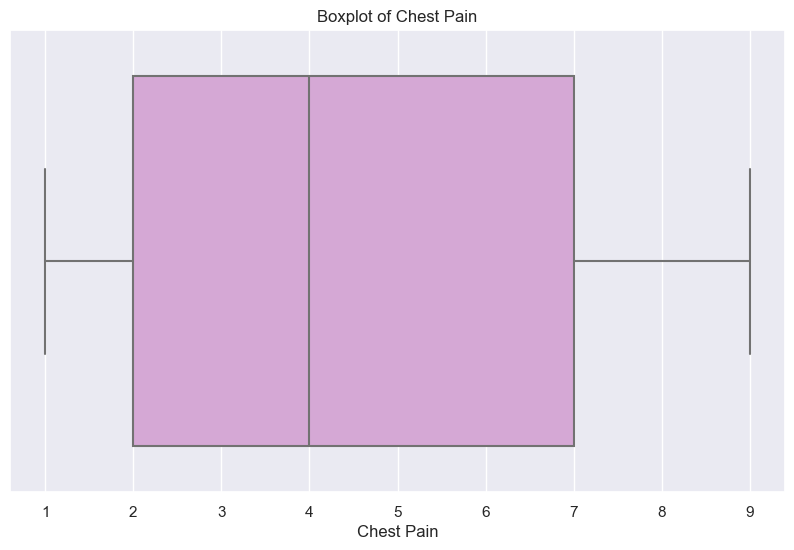

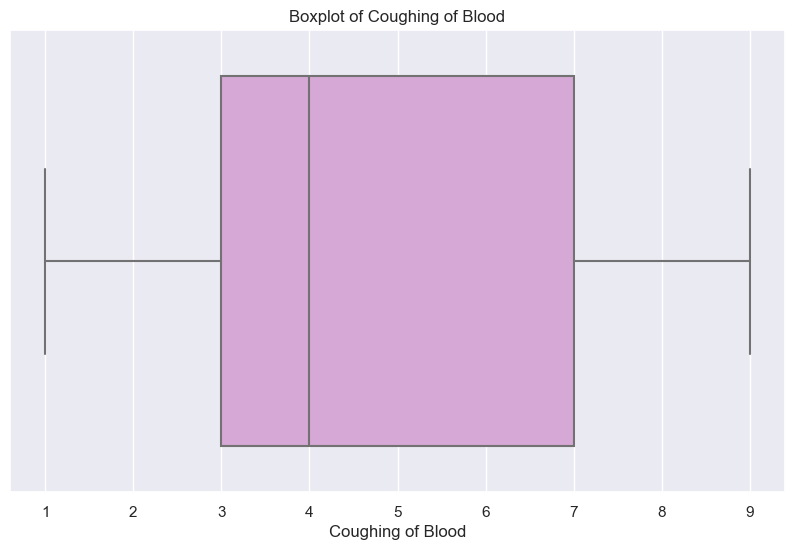

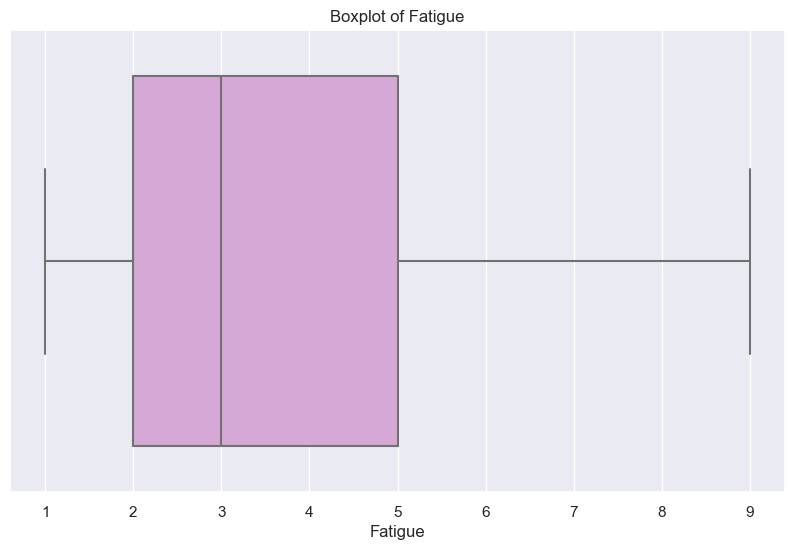

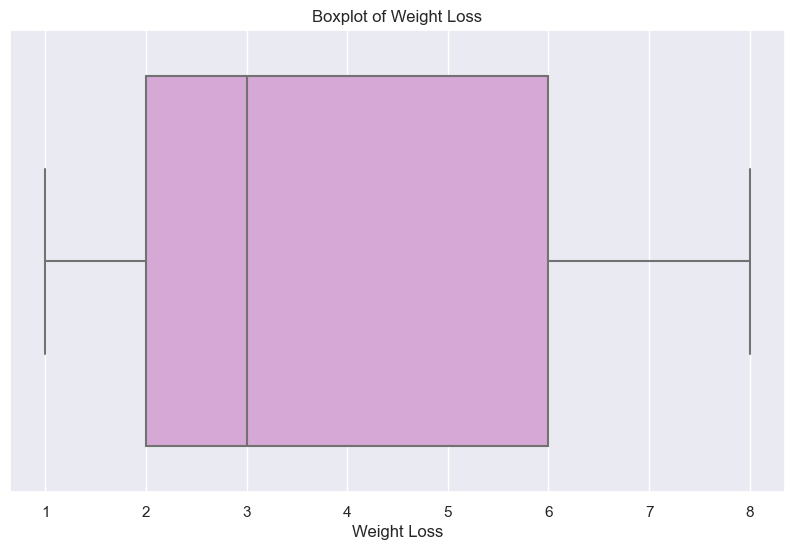

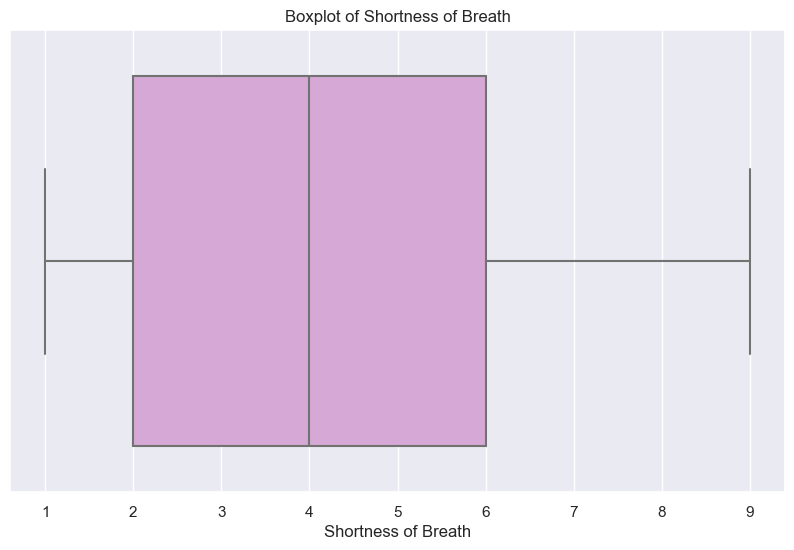

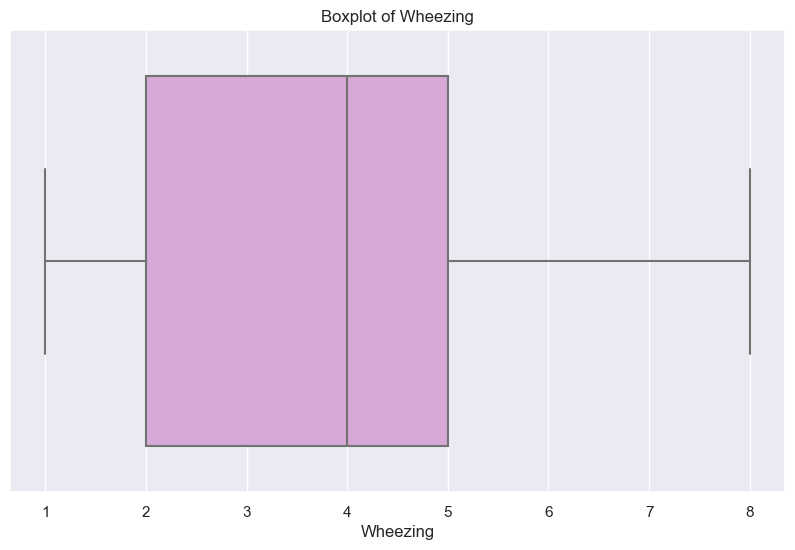

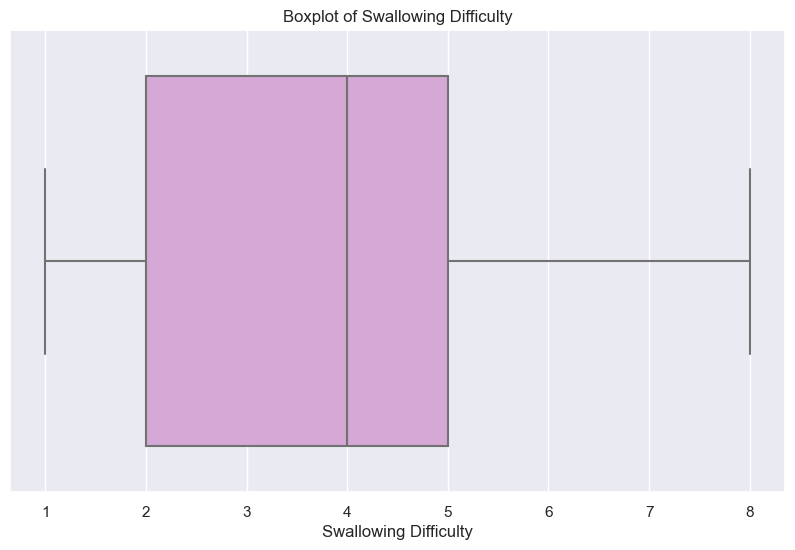

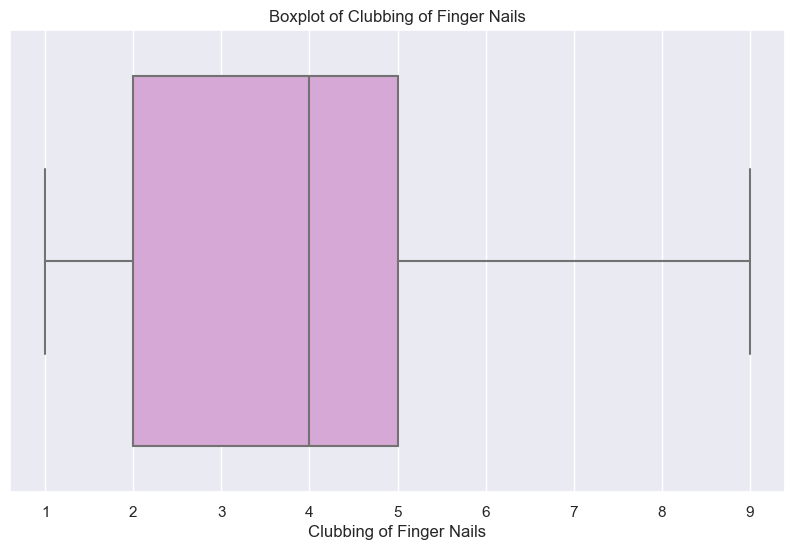

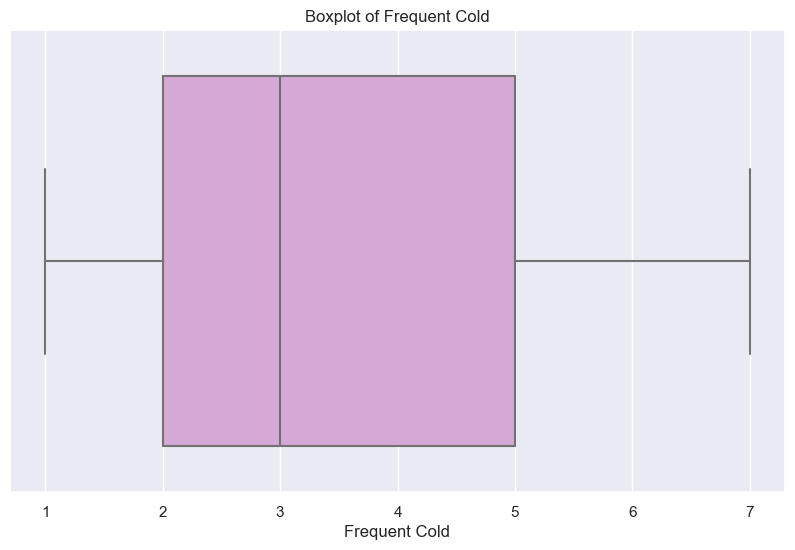

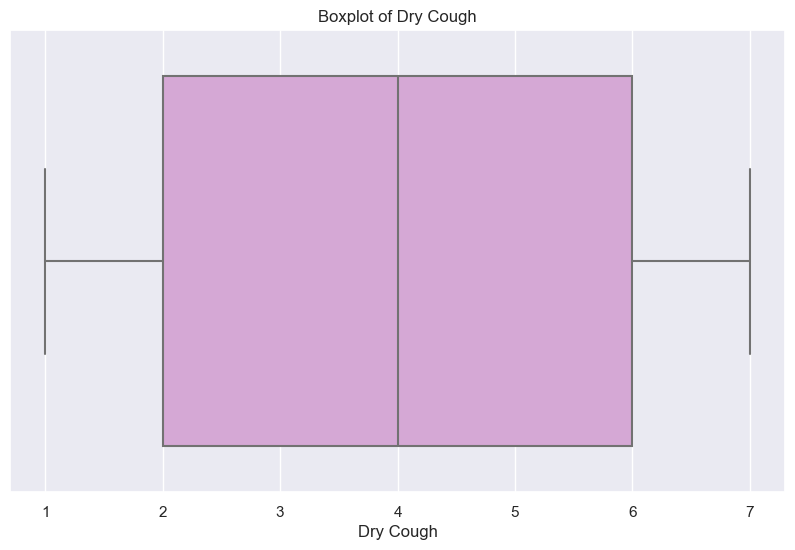

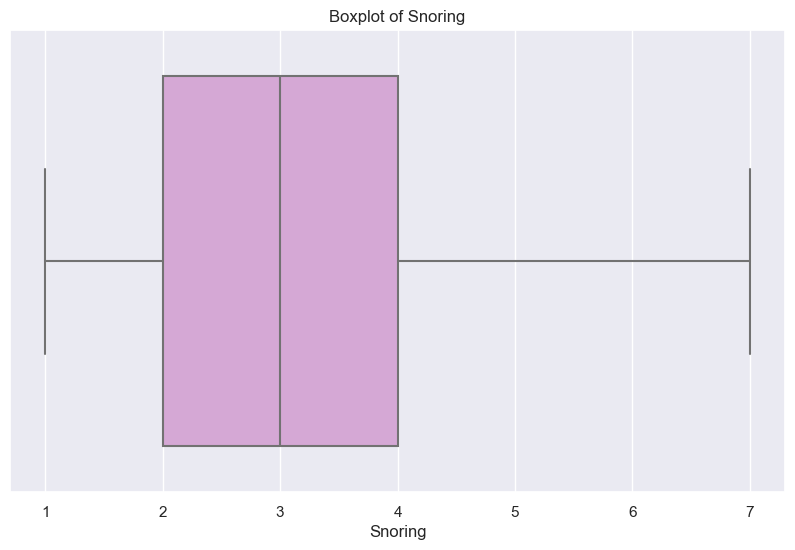

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
palette = ['plum', 'g', 'orange', 'b', 'r']
# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette=palette)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Exploring Categorical features

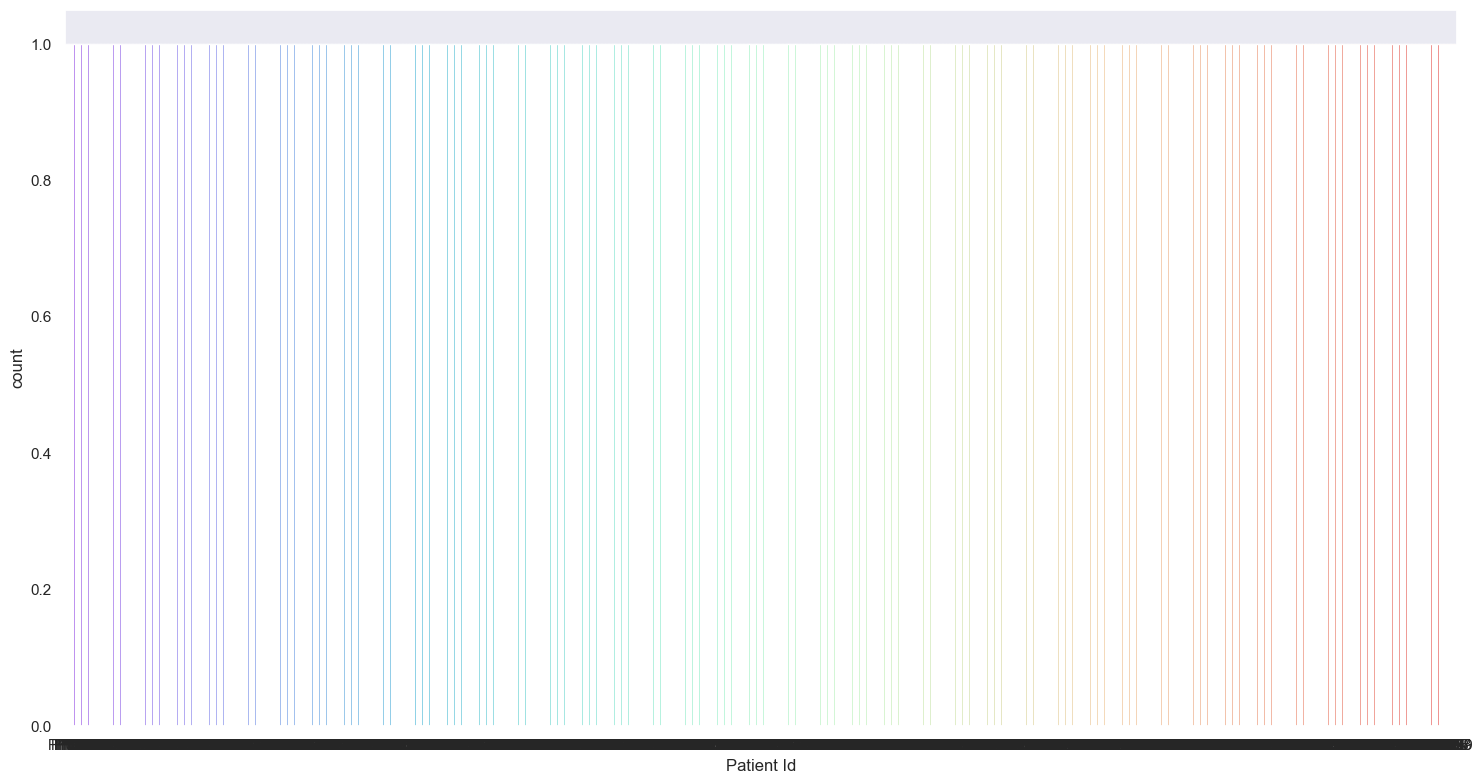

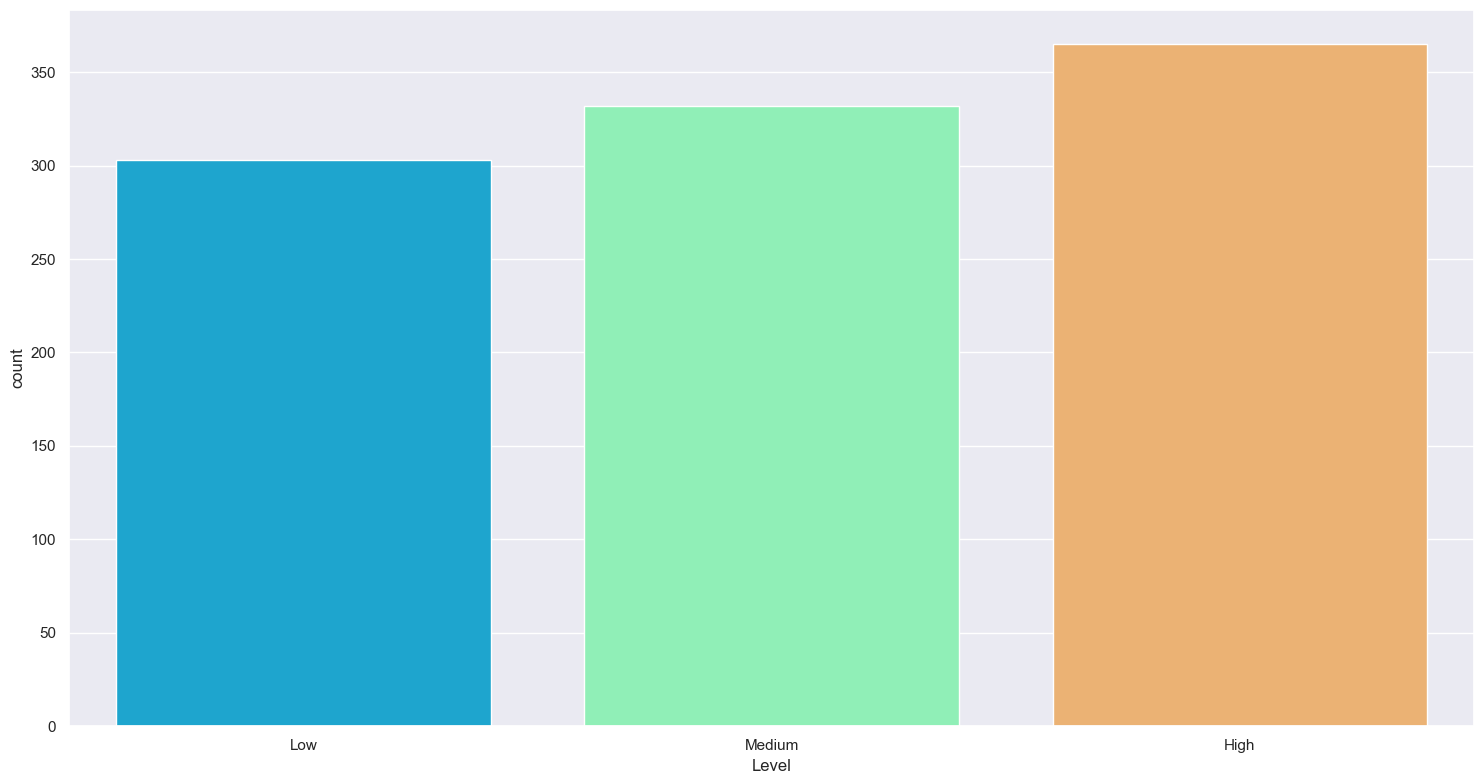

In [16]:
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette='rainbow')
    plt.tight_layout()
    plt.show()

## TASK 3 PART b: (DATA Imbalance Check):

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Target Variable (Level)'}, xlabel='Level'>

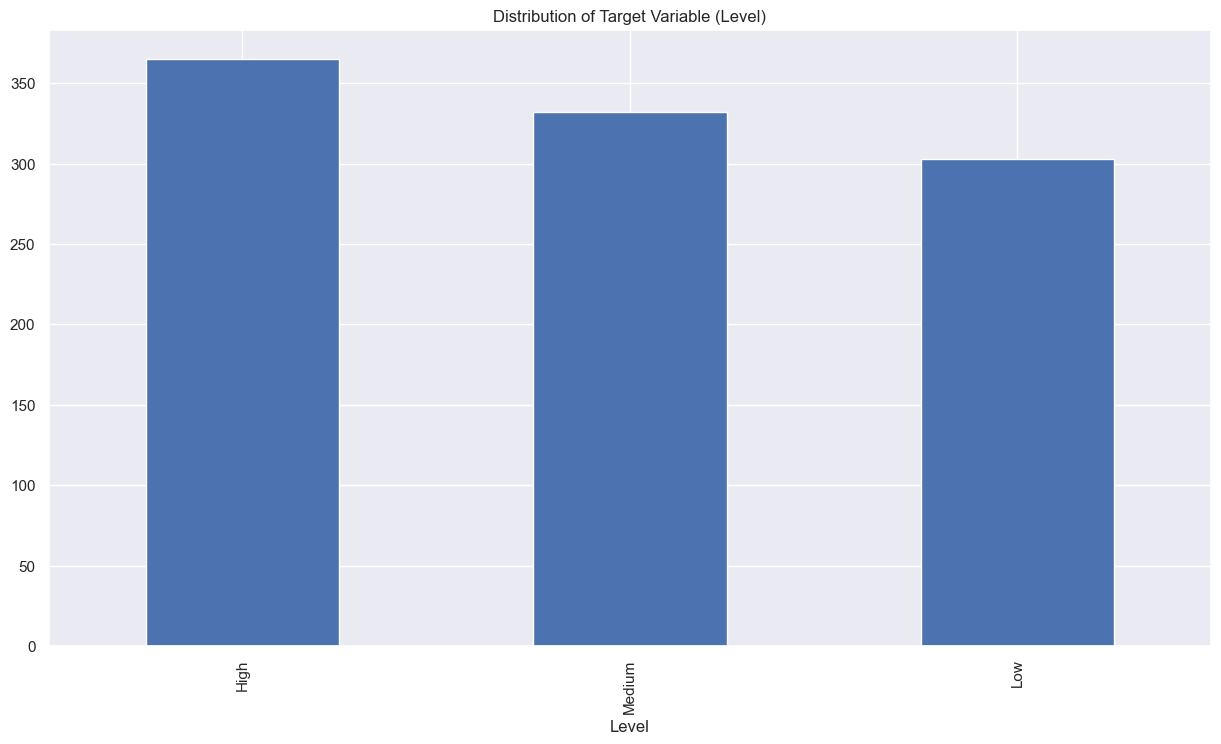

In [18]:
class_distribution = df['Level'].value_counts()

print(class_distribution)

class_distribution.plot(kind='bar', title='Distribution of Target Variable (Level)')

## TASK 3 PART D: (Correlation)

Correlation matrix:
                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.59

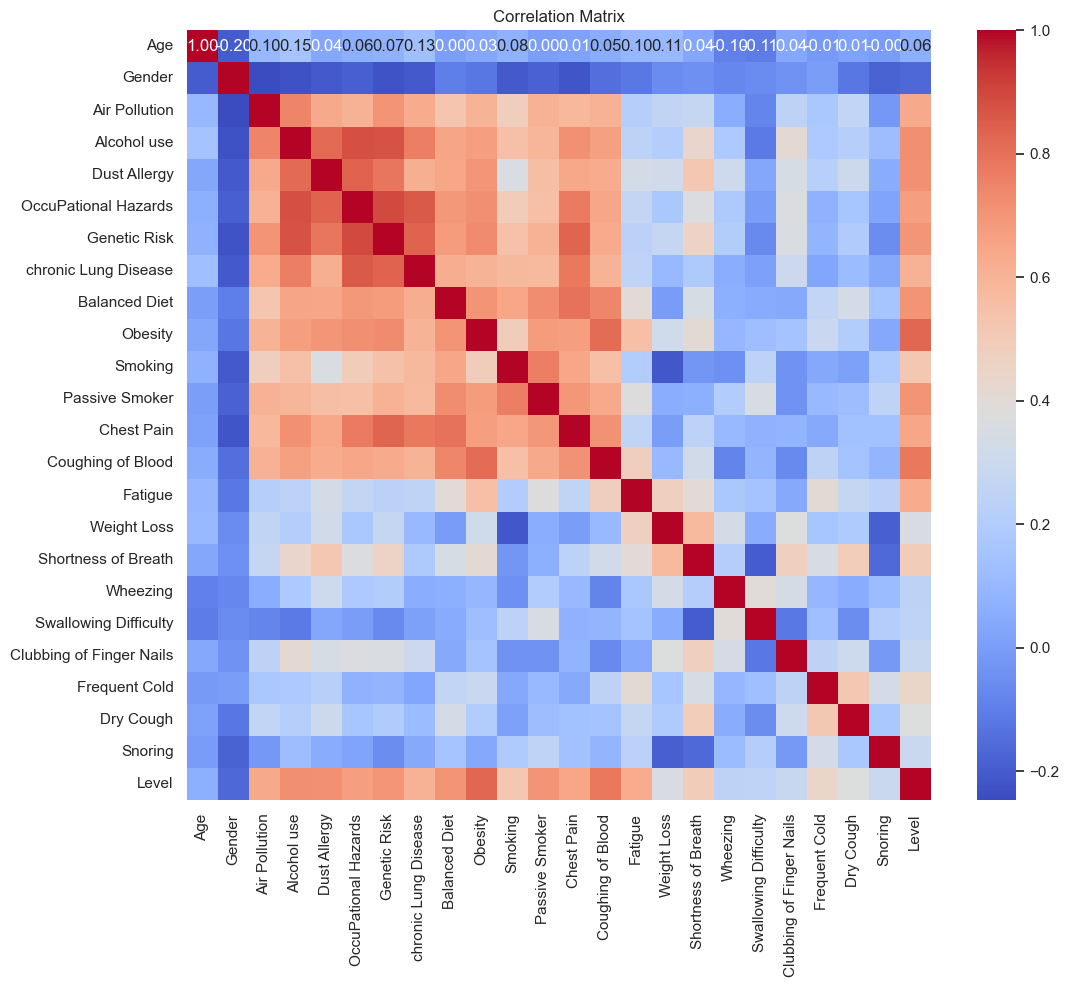

NameError: name 'correlation_with_target' is not defined

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Patient Id'] = pd.factorize(df['Patient Id'])[0]

df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df_numeric = df.drop(columns=['Patient Id'])  # Dropping columns that are not numeric or not needed

correlation_matrix = df_numeric.corr()
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


selected_features = correlation_with_target[abs(correlation_with_target) > 0.2].index # features that have more significance
print("Selected features based on correlation:")
print(selected_features)
df_selected = df[selected_features]

# Task 3 Part E

Original class distribution:
Level
2    365
1    332
0    303
Name: count, dtype: int64

Class distribution after applying SMOTE:
Level
2    72
0    72
1    72
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Target Variable (Level) NOW'}, xlabel='Level'>

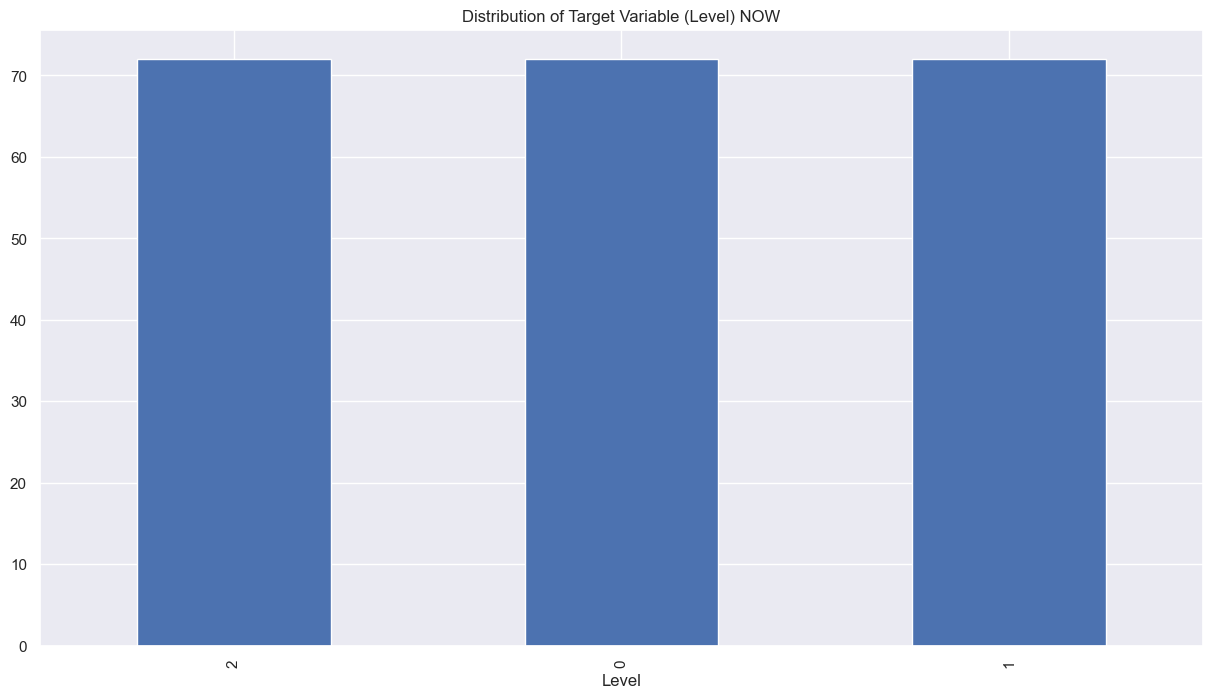

In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

class_distribution = df['Level'].value_counts()
print("Original class distribution:")
print(class_distribution)

X = df.drop(columns=['Level', 'Patient Id'])  # Drop 'Level' (target) and 'Patient Id' (not useful for ML)
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

new_class_distribution = pd.Series(y_train_resampled).value_counts()
print("\nClass distribution after applying SMOTE:")
print(new_class_distribution)
new_class_distribution.plot(kind='bar', title='Distribution of Target Variable (Level) NOW')

# TASK 3 Part F:

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()
X = df.drop(columns=['Level', 'Patient Id'])
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled,
                                                              y_train_resampled, test_size=0.3, random_state=0)

X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Train set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Train set shape: (609, 23)
Validation set shape: (261, 23)
Test set shape: (200, 23)


# Part F Explanation:

Why we Use a Validation Set?

- It allows us to tune hyperparameters and evaluate model performance without using the test data.
- It reflects model's true generalization ability to unseen data.


## TASK 3 Last Part (apply Decision tree)

Train set shape: (609, 23)
Validation set shape: (261, 23)
Test set shape: (200, 23)
Training Accuracy: 1.00
Validation Accuracy: 1.00
Testing Accuracy: 1.00

Confusion Matrix (Test Set):
[[67  0  0]
 [ 0 58  0]
 [ 0  0 75]]


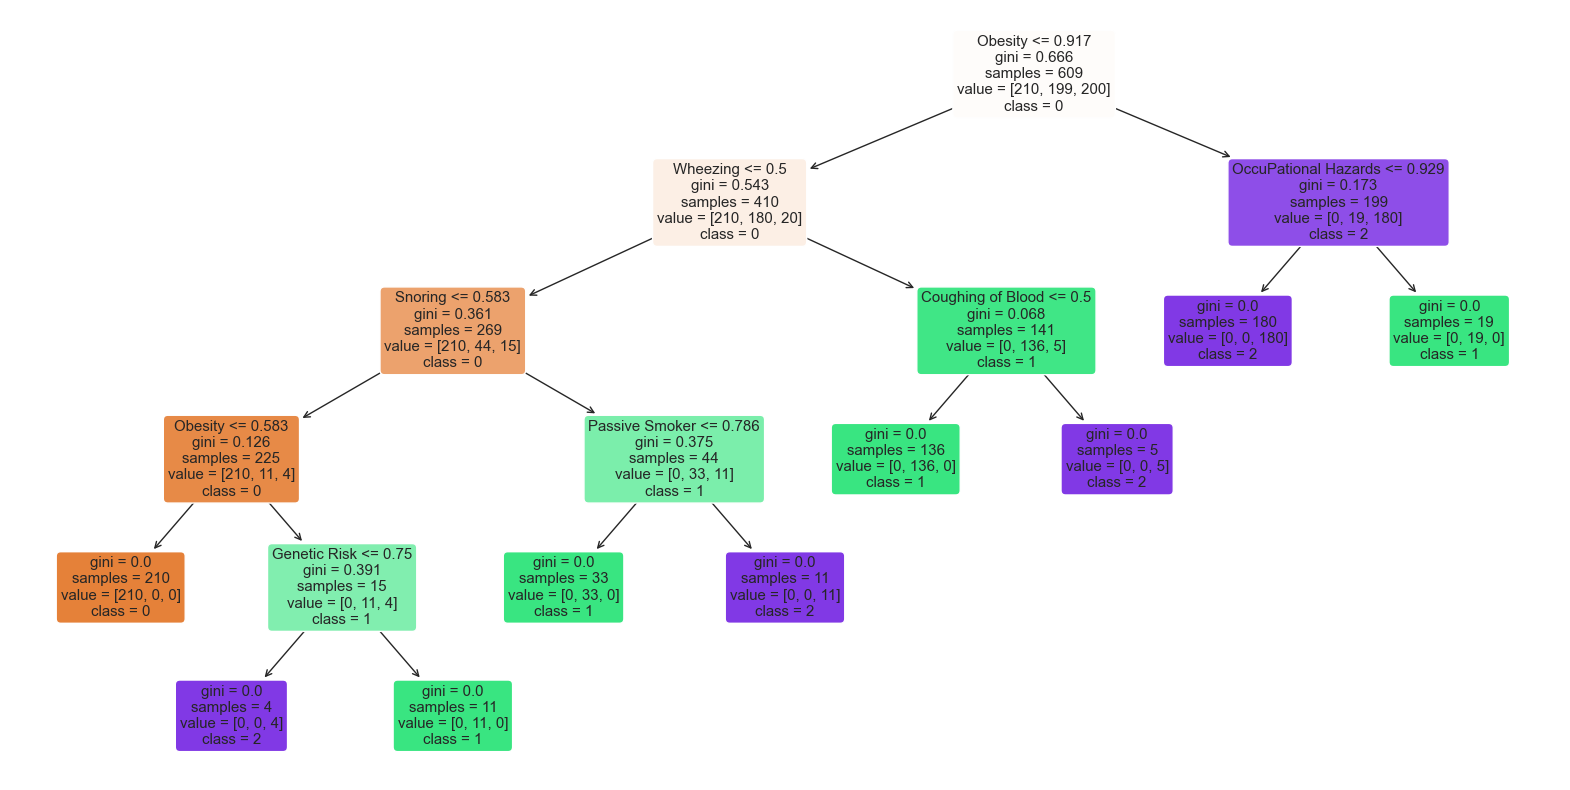

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X = df.drop(columns=['Level', 'Patient Id'])
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=0)

X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Train set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf.fit(X_train_scaled, y_train_final)

# Predict on training, validation, and test sets
y_train_pred = clf.predict(X_train_scaled)
y_val_pred = clf.predict(X_val_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train_final, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in clf.classes_], filled=True, rounded=True)
plt.show()

# TASK 4 (CART ALGORITHM)

Information Gains:
Prior Experience: 0.034851554559677034
Course: 0.3103403047760239
Time: 0.02904940554533142

Root node: Time


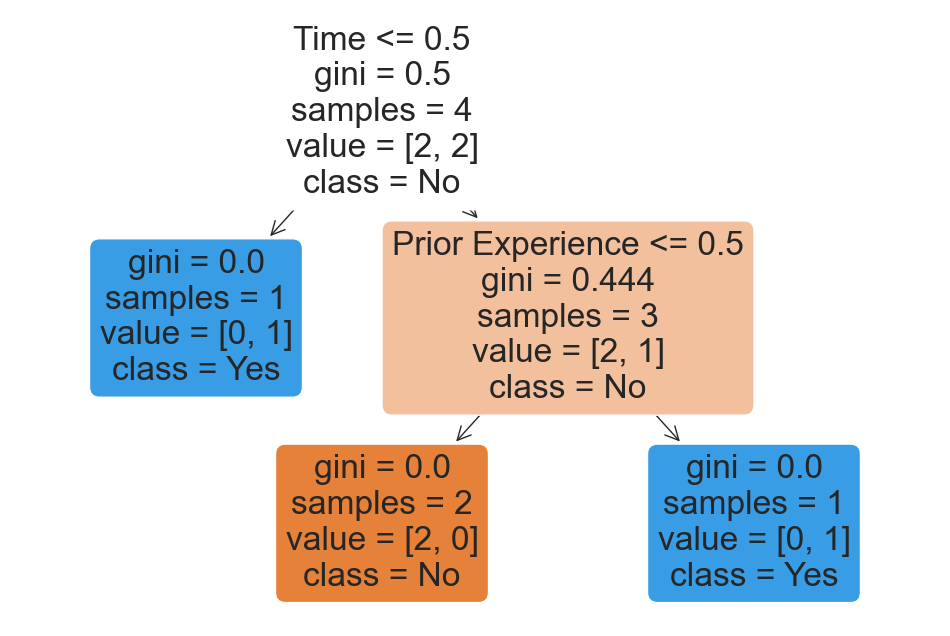

In [28]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

def entropy(column):
    counts = Counter(column)
    probabilities = [count / len(column) for count in counts.values()]
    entropy = -sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def information_gain(data, split_attribute_name, target_name="Liked"):
    # Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    values = data[split_attribute_name].unique()
    
    weighted_entropy = sum([(len(data[data[split_attribute_name] == value]) / len(data)) * 
                            entropy(data[data[split_attribute_name] == value][target_name])
                            for value in values])
    
    information_gain = total_entropy - weighted_entropy
    return information_gain

df = pd.read_csv('task4 lab 4 (Cart Algorithm).csv')

df['Prior Experience'] = df['Prior Experience'].map({'Yes': 1, 'No': 0})
df['Course'] = df['Course'].astype('category').cat.codes
df['Time'] = df['Time'].map({'Day': 1, 'Night': 0})
df['Liked'] = df['Liked'].map({'Yes': 1, 'No': 0})

attributes = ['Prior Experience', 'Course', 'Time']
information_gains = {attr: information_gain(df, attr) for attr in attributes}

print("Information Gains:")
for attr, gain in information_gains.items():
    print(f"{attr}: {gain}")

X = df[['Prior Experience', 'Course', 'Time']]
y = df['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf = clf.fit(X_train, y_train)

# Find the root node
root_node = clf.tree_.feature[0]
root_feature = X.columns[root_node]
print(f"\nRoot node: {root_feature}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
